In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data into a dataframe
dfCovid = pd.read_csv("covid19_data.csv")
dfCovid.head()
dfCovid.tail()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,policy
362,3/1/2021,NC,11254.0,9959.0,42,1295.0,NaN,NaN,1319.0,0,...,25289,NaN,766208.0,NaN,NaN,NaN,0,9525274.0,25289,0
363,3/2/2021,NC,11288.0,9987.0,34,1301.0,NaN,NaN,1353.0,0,...,16397,NaN,770210.0,NaN,NaN,NaN,0,9541671.0,16397,0
364,3/3/2021,NC,11363.0,10050.0,75,1313.0,NaN,NaN,1303.0,0,...,19976,NaN,779652.0,NaN,NaN,NaN,0,9561647.0,19976,0
365,3/4/2021,NC,11399.0,10083.0,36,1316.0,NaN,NaN,1290.0,0,...,44050,NaN,790416.0,NaN,NaN,NaN,0,9605697.0,44050,0
366,3/5/2021,NC,11446.0,10125.0,47,1321.0,NaN,NaN,1226.0,0,...,44487,NaN,798257.0,NaN,NaN,NaN,0,9650184.0,44487,0


In [4]:
# Get the shape of the dataset
dfCovid.shape

(367, 42)

In [5]:
# Get the types of data
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              367 non-null    object 
 1   state                             367 non-null    object 
 2   death                             355 non-null    float64
 3   deathConfirmed                    307 non-null    float64
 4   deathIncrease                     367 non-null    int64  
 5   deathProbable                     161 non-null    float64
 6   hospitalized                      0 non-null      float64
 7   hospitalizedCumulative            0 non-null      float64
 8   hospitalizedCurrently             346 non-null    float64
 9   hospitalizedIncrease              367 non-null    int64  
 10  inIcuCumulative                   0 non-null      float64
 11  inIcuCurrently                    227 non-null    float64
 12  negative

In [6]:
# Find duplicate rows, if any
dup_rows = dfCovid[dfCovid.duplicated()]
print("Number of Duplicated Rows: " , dup_rows.shape)

Number of Duplicated Rows:  (0, 42)


In [7]:
# Investigate the data characteristics
dfCovid.describe().T

,count,mean,std,min,25%,50%,75%,max
death,355.0,3.729966e+03,3.220292e+03,0.0,1098.00,2958.0,5551.5,11446.0
deathConfirmed,307.0,4.063612e+03,2.751970e+03,422.0,1631.50,3600.0,5867.0,10125.0
deathIncrease,367.0,3.118801e+01,3.295452e+01,0.0,8.00,23.0,40.0,169.0
deathProbable,161.0,4.420870e+02,4.283359e+02,27.0,91.00,242.0,753.0,1321.0
hospitalized,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hospitalizedCumulative,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hospitalizedCurrently,346.0,1.397931e+03,9.717941e+02,29.0,830.25,1089.5,1766.0,3990.0
hospitalizedIncrease,367.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.0,0.0
inIcuCumulative,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inIcuCurrently,227.0,4.440705e+02,1.837626e+02,244.0,299.50,350.0,587.5,880.0


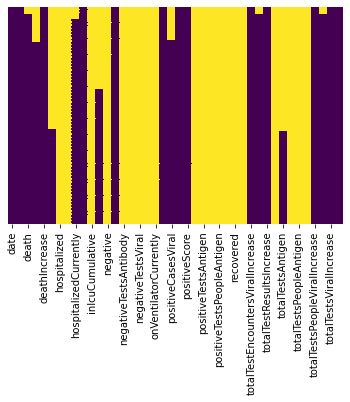

In [8]:
# Find missing values
sn_heat = sn.heatmap(dfCovid.isnull(), cbar=False, yticklabels=False, cmap='viridis')
sn_heat.figure.savefig("nan_heatmap.jpg")

In [9]:
# If a column only contains 'NaN' values, we will drop it

dfCovid = dfCovid.drop(columns=['hospitalized', 'inIcuCumulative', 'negative', 'negativeTestsAntibody', 'negativeTestsViral', 'onVentilatorCurrently', 'positiveTestsAntigen', 'positiveTestsPeopleAntigen', 
                     'recovered', 'totalTestResultsIncrease', 'totalTestsPeopleAntigen', 'totalTestsViralIncrease'], axis=1)

#dfCovid.drop(columns=['hospitalized'])

<AxesSubplot:>

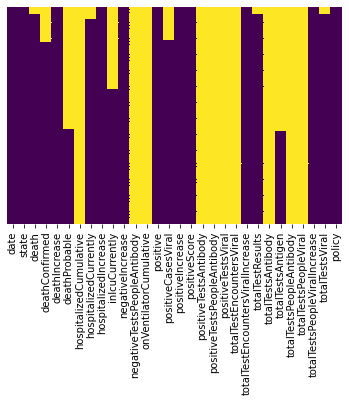

In [10]:
# Check for anymore columns with only'NaN' values
sn.heatmap(dfCovid.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [11]:
# Drop the remaining columns with 'NaN' values
dfCovid = dfCovid.drop(columns=['hospitalizedCumulative', 'negativeTestsPeopleAntibody', 'onVentilatorCumulative', 'positiveTestsAntibody',
                                'positiveTestsViral', 'totalTestEncountersViral', 'totalTestsAntibody', 'totalTestsPeopleViral'])

<AxesSubplot:>

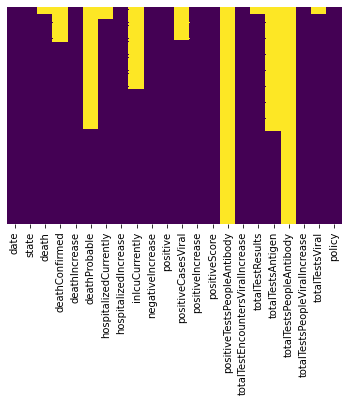

In [12]:
# Check for anymore columns with only'NaN' values
sn.heatmap(dfCovid.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [13]:
# Drop the remaining columns with 'NaN' values
dfCovid = dfCovid.drop(columns=['positiveTestsPeopleAntibody', 'totalTestsPeopleAntibody', 'totalTestResults', 'deathProbable'])

<AxesSubplot:>

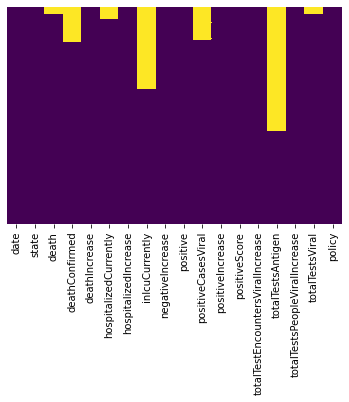

In [14]:
# Check for anymore columns with only'NaN' values
sn.heatmap(dfCovid.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<AxesSubplot:>

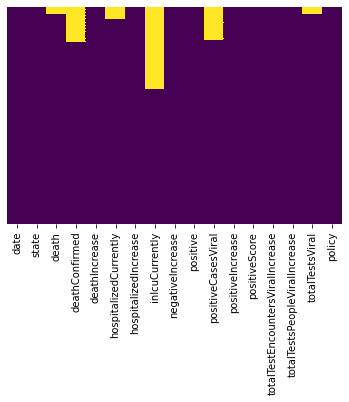

In [15]:
# Drop the remaining columns with 'NaN' values
dfCovid = dfCovid.drop(columns=['totalTestsAntigen'])

# Check for anymore columns with only'NaN' values
sn.heatmap(dfCovid.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [16]:
# Re-describe the data
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              367 non-null    object 
 1   state                             367 non-null    object 
 2   death                             355 non-null    float64
 3   deathConfirmed                    307 non-null    float64
 4   deathIncrease                     367 non-null    int64  
 5   hospitalizedCurrently             346 non-null    float64
 6   hospitalizedIncrease              367 non-null    int64  
 7   inIcuCurrently                    227 non-null    float64
 8   negativeIncrease                  367 non-null    int64  
 9   positive                          367 non-null    int64  
 10  positiveCasesViral                311 non-null    float64
 11  positiveIncrease                  367 non-null    int64  
 12  positive

In [17]:
# Impute missing data as 0
dfCovid = dfCovid.fillna(0)

dfCovid.tail()

,date,state,death,deathConfirmed,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,positive,positiveCasesViral,positiveIncrease,positiveScore,totalTestEncountersViralIncrease,totalTestsPeopleViralIncrease,totalTestsViral,policy
362,3/1/2021,NC,11254.0,9959.0,42,1319.0,0,333.0,0,862170,752406.0,3622,0,0,0,9525274.0,0
363,3/2/2021,NC,11288.0,9987.0,34,1353.0,0,334.0,0,863409,753280.0,1239,0,0,0,9541671.0,0
364,3/3/2021,NC,11363.0,10050.0,75,1303.0,0,332.0,0,865554,754610.0,2145,0,0,0,9561647.0,0
365,3/4/2021,NC,11399.0,10083.0,36,1290.0,0,326.0,0,868056,756509.0,2502,0,0,0,9605697.0,0
366,3/5/2021,NC,11446.0,10125.0,47,1226.0,0,314.0,0,870149,758115.0,2093,0,0,0,9650184.0,0


In [18]:
# Remove columns with only zero values
dfCovid = dfCovid.drop(columns=['hospitalizedIncrease', 'negativeIncrease', 'positiveScore', 'totalTestEncountersViralIncrease',
                               'totalTestsPeopleViralIncrease'])

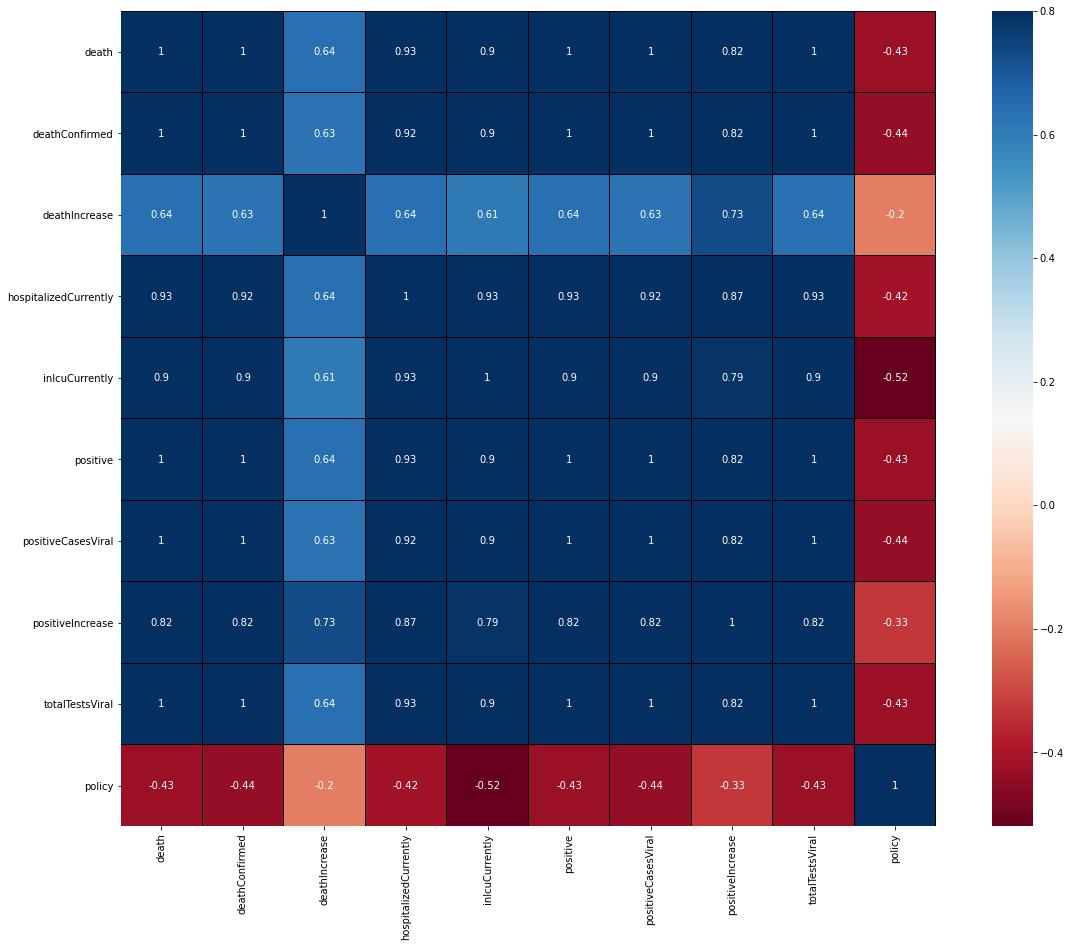

In [19]:
# Determine the correlation between variables
corr = dfCovid.corr(method='spearman')
plt.figure(figsize=(20,15))
corrplot = sn.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='RdBu', linecolor='black')
corrplot.figure.savefig("correlation.jpg")

<AxesSubplot:xlabel='policy', ylabel='deathIncrease'>

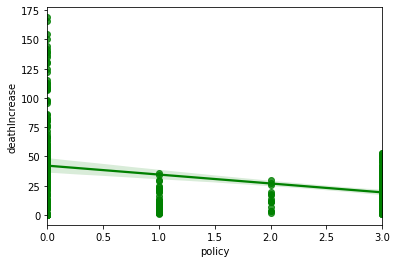

In [20]:
# Check the relationship between policy and death
sn.regplot(x=dfCovid['policy'].astype(int), y=dfCovid.deathIncrease, color='g')

<AxesSubplot:xlabel='policy', ylabel='deathIncrease'>

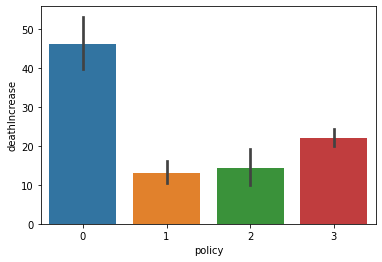

In [21]:
# Bar plot to show means for each policy value
sn.barplot(x=dfCovid['policy'].astype(int), y=dfCovid.deathIncrease)

In [22]:
dfFinal = dfCovid

In [22]:
# dfFinal.to_csv(r'covid_preprocessed.csv')

In [36]:
dfFinal['month'] = pd.DatetimeIndex(dfFinal['date']).month

dfFinal['month_year'] = pd.to_datetime(dfFinal['date']).dt.to_period('M')
dfFinal['month_year'] = dfFinal.month_year.map(str)
dfFinal.head()
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   367 non-null    object 
 1   state                  367 non-null    object 
 2   death                  367 non-null    float64
 3   deathConfirmed         367 non-null    float64
 4   deathIncrease          367 non-null    int64  
 5   hospitalizedCurrently  367 non-null    float64
 6   inIcuCurrently         367 non-null    float64
 7   positive               367 non-null    int64  
 8   positiveCasesViral     367 non-null    float64
 9   positiveIncrease       367 non-null    int64  
 10  totalTestsViral        367 non-null    float64
 11  policy                 367 non-null    int64  
 12  month                  367 non-null    int64  
 13  month_year             367 non-null    object 
dtypes: float64(6), int64(5), object(3)
memory usage: 40.3+ KB


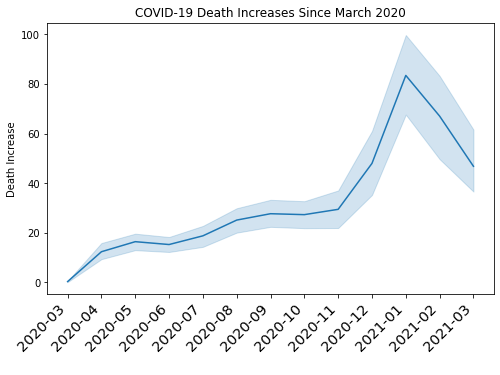

In [54]:
plt.figure(figsize=(8,5))
line = sn.lineplot(data=dfFinal, x="month_year", y="deathIncrease")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
line.set(xlabel=' ', ylabel='Death Increase')
line.set_title("COVID-19 Death Increases Since March 2020")
line.figure.savefig("timeseries.jpg", transparent=True, bbox_inches='tight')